In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 1678 to 4038
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
1678,34.5,11.0,3.89,4.9,485,28.3,31.9,88.7,38,F,out
3454,50.4,17.2,5.69,9.2,303,30.2,34.1,88.6,66,M,out
4169,31.8,10.3,3.19,7.6,220,32.3,32.4,99.7,79,F,in
2140,37.0,12.2,4.23,4.0,260,28.8,33.0,87.5,46,F,out
1551,41.6,13.9,5.05,15.0,212,27.5,33.4,82.4,36,F,out


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,202
HAEMOGLOBINS,97
ERYTHROCYTE,232
LEUCOCYTE,146
THROMBOCYTE,252
MCH,108
MCHC,66
MCV,198
AGE,84
SEX,2


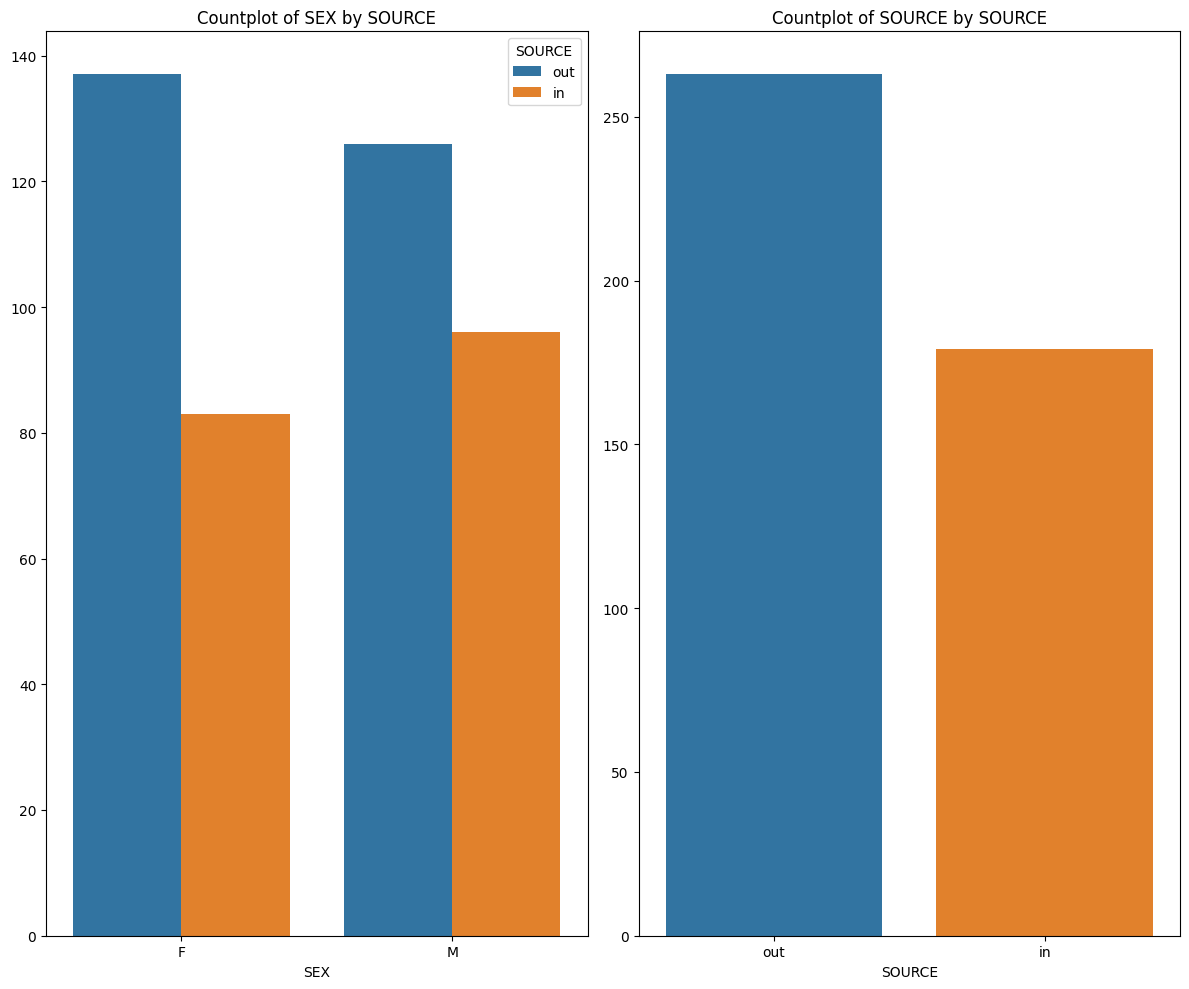

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,38.651357,6.019369,22.00,34.5250,39.15,42.900,56.30
HAEMOGLOBINS,442.0,12.909955,2.142718,6.80,11.4000,13.10,14.400,18.20
ERYTHROCYTE,442.0,4.550158,0.771033,2.09,4.0525,4.59,5.070,7.48
LEUCOCYTE,442.0,8.736652,5.080242,1.20,5.7000,7.60,10.400,47.70
THROMBOCYTE,442.0,265.540724,110.217202,18.00,194.0000,265.50,322.750,834.00
MCH,442.0,28.520136,2.560068,15.80,27.5000,28.90,30.000,34.20
MCHC,442.0,33.366290,1.271266,26.40,32.6000,33.35,34.100,37.80
MCV,442.0,85.413575,6.472516,59.70,82.4000,86.00,88.875,105.30
AGE,442.0,47.479638,21.121091,1.00,30.0000,47.50,63.000,92.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

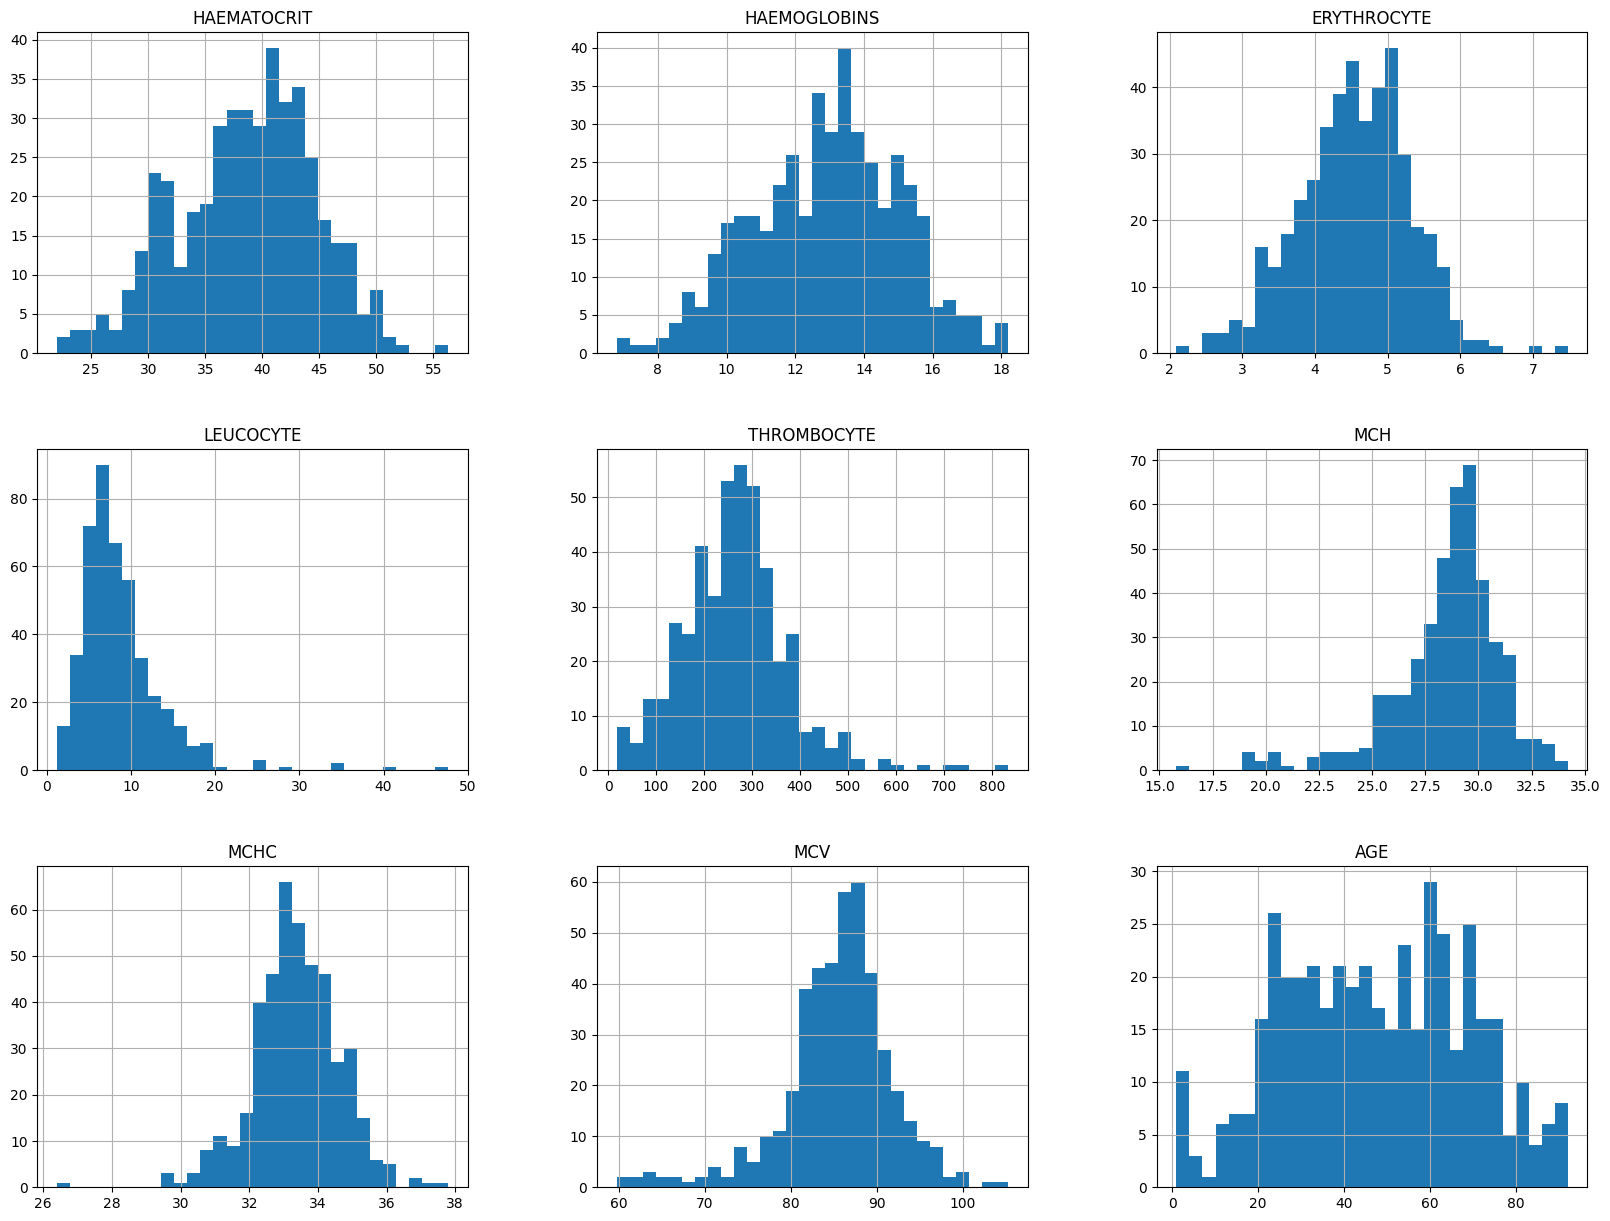

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

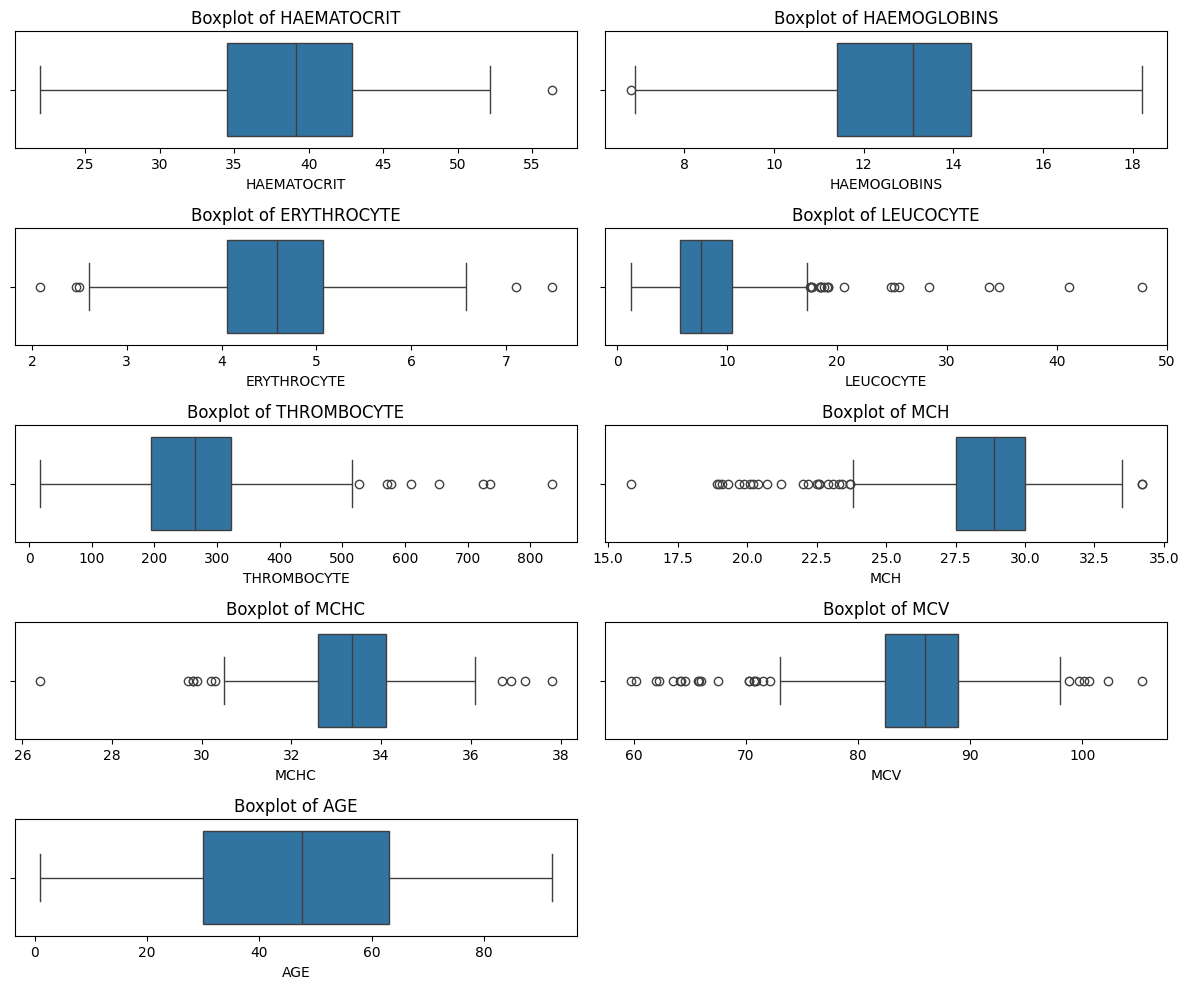

In [8]:
create_boxplots_from_df(df_numerical)

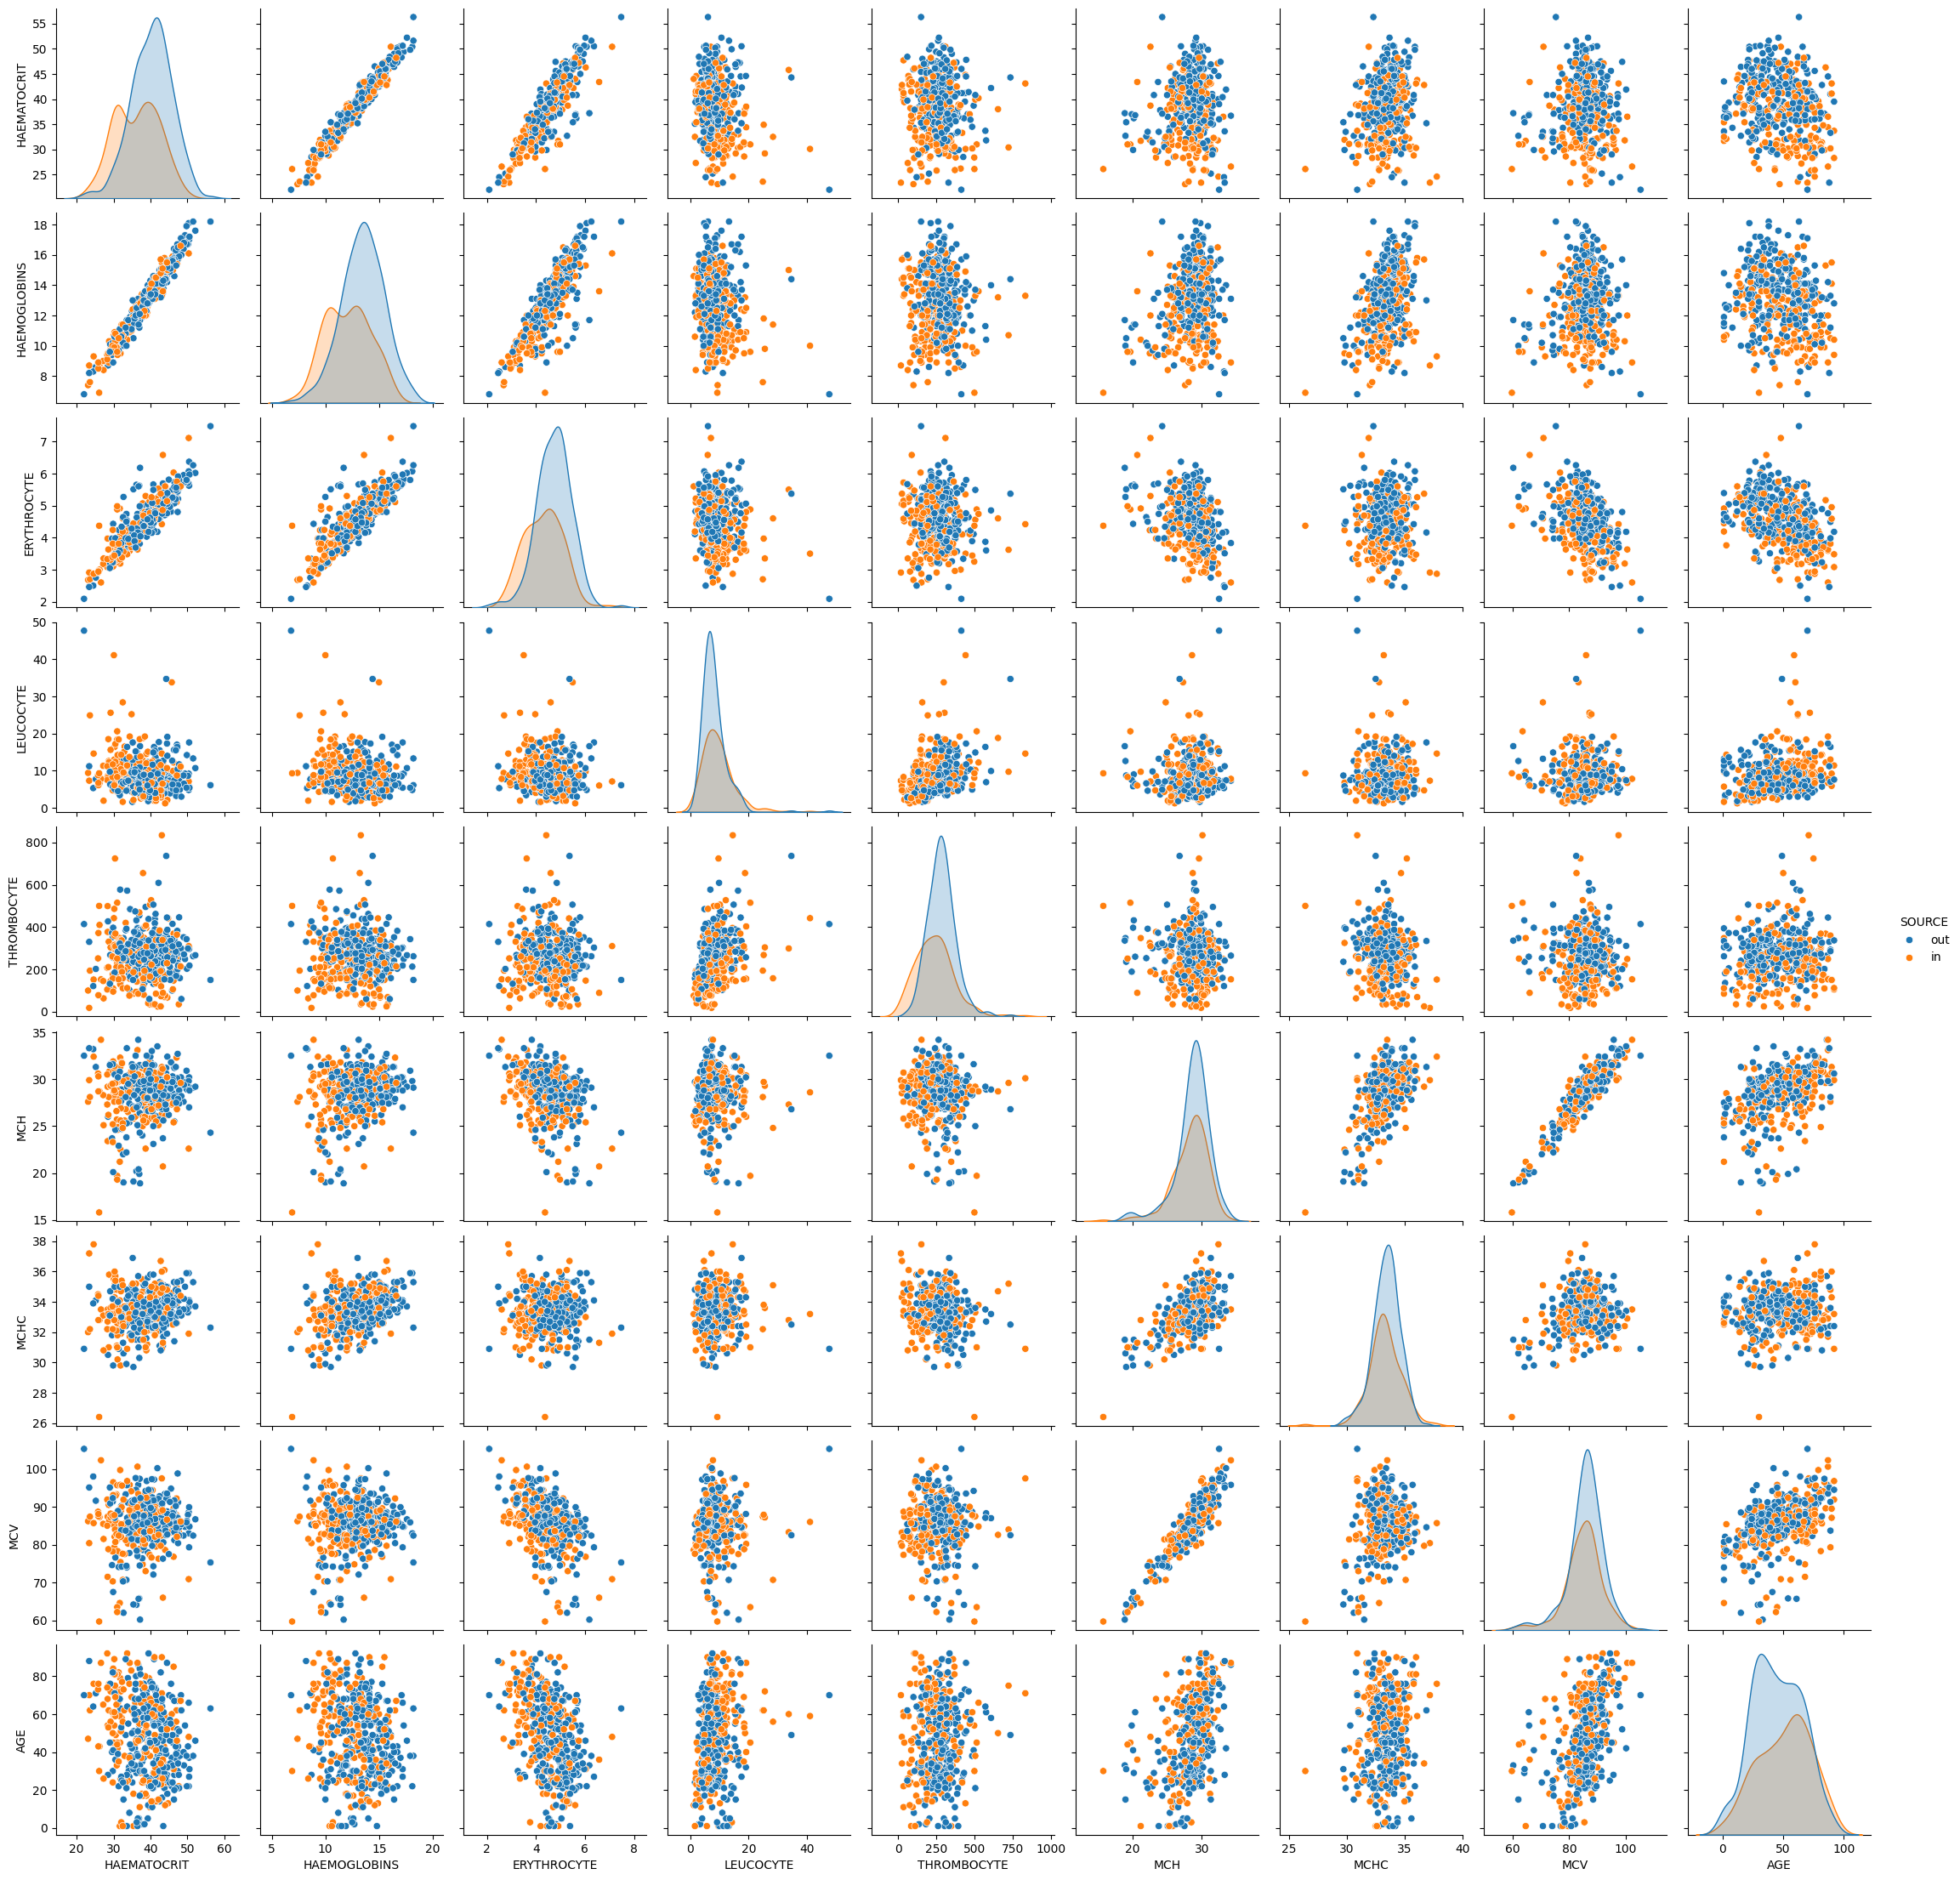

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.976751,0.887961,-0.165527,-0.014167,0.086114,0.163329,0.027776,-0.218327
HAEMOGLOBINS,0.976751,1.000000,0.841805,-0.157265,-0.048285,0.208970,0.367036,0.075082,-0.190053
ERYTHROCYTE,0.887961,0.841805,1.000000,-0.147762,-0.007445,-0.342231,0.021069,-0.425827,-0.402472
LEUCOCYTE,-0.165527,-0.157265,-0.147762,1.000000,0.341667,0.006408,-0.014692,0.020518,0.196288
THROMBOCYTE,-0.014167,-0.048285,-0.007445,0.341667,1.000000,-0.084210,-0.166936,-0.022573,0.051469
MCH,0.086114,0.208970,-0.342231,0.006408,-0.084210,1.000000,0.608014,0.916474,0.433068
MCHC,0.163329,0.367036,0.021069,-0.014692,-0.166936,0.608014,1.000000,0.242665,0.096651
MCV,0.027776,0.075082,-0.425827,0.020518,-0.022573,0.916474,0.242665,1.000000,0.474187
AGE,-0.218327,-0.190053,-0.402472,0.196288,0.051469,0.433068,0.096651,0.474187,1.000000


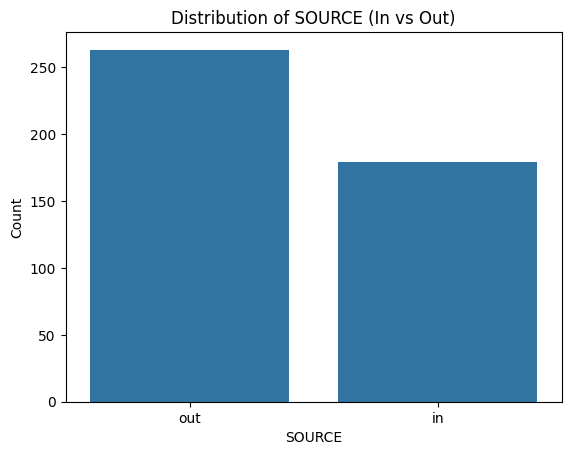

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
